# MOUNT DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

BASE_PATH = "/content/drive/My Drive/2019 Fall ML Project/"
DATA_PATH = BASE_PATH + "Dataset/"
DIV2K_PATH = DATA_PATH + "DIV2K/"
BLUR_PATH = DATA_PATH + "BLUR/"
ANIME_PATH = DATA_PATH + "ANIME/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
% cd $DIV2K_PATH

/content/drive/My Drive/2019 Fall ML Project/Dataset/DIV2K


# Data

## DIV2K

### DIV2K Overview

In [0]:
from math import ceil, floor, log10
from matplotlib.pyplot import imshow
import numpy as np
from numpy.random import randint
from PIL import Image               # to load images
from IPython.display import display # to display images
from skimage.measure import compare_psnr as psnr
from skimage.measure import compare_ssim as ssim

# def psnr(img1, img2):
#     mse = numpy.mean( (img1 - img2) ** 2 )
#     if mse == 0:
#       return 100
#     PIXEL_MAX = 255.0 #using max rgb value
#     return 20 * log10(PIXEL_MAX / math.sqrt(mse))



%matplotlib inline

def squaring(img):
    l, w, _ = img.shape
    if (l > w):
        d = w
    else:
        d = l
    return img[ :d+1 , :d+1 ,:]

samples_selection = { }

frame_width = 3000
images_per_row = 30
padding = 2

images = []
i = 0

while i < 300:
    r = randint(1, 801)
    s = "/content/drive/My Drive/2019 Fall ML Project/Dataset/DIV2K/DIV2K_train_HR/" + "{0:04d}".format(r) + '.png'
    if s not in images:
        images.append(s)
        i += 1


img_width, img_height, _ = squaring(np.array(Image.open(images[0]))).shape
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.fromarray(squaring(np.array(Image.open(im))))
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

display(new_im)

Output hidden; open in https://colab.research.google.com to view.

### DIV2K Sample 1

In [0]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from numpy.random import randint

FONTSIZE = 40
FIGSIZE = (120, 60)

sample_number = "{0:04d}".format(680)

templates = [
            "DIV2K_train_HR/&.png",
            "DIV2K_train_LR_bicubic/X4/&x4.png",
            "DIV2K_train_LR_mild/&x4m.png",
            "DIV2K_train_LR_x8/&x8.png",
          ]

samples = list(map(lambda s:s.replace('&', sample_number), templates))
imgs = [np.array(Image.open(DIV2K_PATH+img)) for img in samples]
fig, ax = plt.subplots(1, 4, figsize=FIGSIZE)

for i in range(len(imgs)):
      ax[i%4].imshow(imgs[i])
      ax[i%4].set_title(samples[i].split('/')[-1], fontsize=FONTSIZE)

Output hidden; open in https://colab.research.google.com to view.

### DIV2K Sample 2

In [0]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from numpy.random import randint

sample_number = "{0:04d}".format(359)

samples = list(map(lambda s:s.replace('&', sample_number), templates))
imgs = [np.array(Image.open(DIV2K_PATH+img)) for img in samples]
fig, ax = plt.subplots(1, 4, figsize=FIGSIZE)

for i in range(len(imgs)):
      ax[i%4].imshow(imgs[i])
      ax[i%4].set_title(samples[i].split('/')[-1], fontsize=FONTSIZE)

Output hidden; open in https://colab.research.google.com to view.

## ANIME FACES

### Anime Faces Overview

#### Hide

In [2]:
% cd $ANIME_PATH
! ls | grep -c '.jpg'

/content/drive/My Drive/2019 Fall ML Project/Dataset/ANIME
491


In [3]:
from glob import glob

samples = glob("*.jpg")

len(samples)

491

#### Overview

In [5]:
from math import ceil, floor
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image               # to load images
from IPython.display import display # to display images
from tqdm import tqdm


%matplotlib inline

samples_selection = {"_2000.jpg":0, "_2004.jpg":7182, "_2008.jpg":20527, "_2012.jpg":36309}

num_images = 300
frame_width = 2000
images_per_row = 30
padding = 2

images = samples

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(num_images/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 
frame_width += padding*10
new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
count = 0
for im in tqdm(images):
    try:
      im = Image.open(im)
    except:
      print("IO error")
      continue
    if im.size[0] < 60:
        continue
    if count%images_per_row==0:
        i=0
    count+=1
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1
    if count >= num_images:
      break

display(new_im)

Output hidden; open in https://colab.research.google.com to view.

# Preliminary Experiments

## Function Definition

In [0]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from scipy.interpolate import interp2d

def sample_area(img, b, e):
    s = img.shape
    return img[ int(s[0]*b):int(s[0]*e) , int(s[1]*b):int(s[1]*e) ,:]

def interpolate_img(img, w_new, h_new, kind='cubic'):
    ds_factor =  len(w_new) / img.shape[0]
    x = np.arange(0, img.shape[0], 1) * ds_factor
    y = np.arange(0, img.shape[1], 1) * ds_factor
    fR = interp2d(x, y, img[:,:,0].T, kind=kind)
    fG = interp2d(x, y, img[:,:,1].T, kind=kind)
    fB = interp2d(x, y, img[:,:,2].T, kind=kind)
    return np.dstack((fR(w_new, h_new).T, fG(w_new, h_new).T, fB(w_new, h_new).T)).astype(int)

## DIV2K DEMO

### DIV2K Sample 1

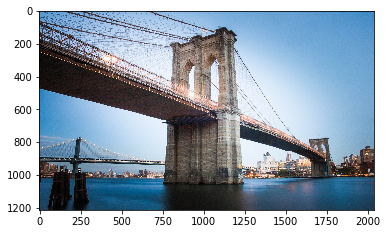

In [0]:
sample_index = "0680"

templates = [
            "DIV2K_train_HR/&.png",
            "DIV2K_train_LR_bicubic/X4/&x4.png",
            "DIV2K_train_LR_mild/&x4m.png",
            "DIV2K_train_LR_x8/&x8.png"
          ]

samples = list(map(lambda s:s.replace('&', sample_index), templates))
imgs = [np.array(Image.open(DIV2K_PATH+img)) for img in samples]
SR_imgs_linear = [imgs[0]]
SR_imgs_cubic = [imgs[0]]
SR_imgs_quintic = [imgs[0]]

x_new = np.arange(0, imgs[0].shape[0], 1)
y_new = np.arange(0, imgs[0].shape[1], 1)

for i in range(1, len(imgs)):
    SR_imgs_linear.append(interpolate_img(imgs[i], x_new, y_new, kind="linear"))
    SR_imgs_cubic.append(interpolate_img(imgs[i], x_new, y_new, kind="cubic"))
    SR_imgs_quintic.append(interpolate_img(imgs[i], x_new, y_new, kind="quintic"))

SR_EDSR_imgs = [imgs[0],
                np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}x4_x4_SR.png'.format(sample_index), 'r')),
                np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}x4m_x4_SR.png'.format(sample_index), 'r')),
                np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}x8_x4_SR.png'.format(sample_index), 'r'))]
plt.imshow(sample_area(imgs[0], 0, 1))

/usr/local/lib/python3.6/dist-packages/skimage/measure/simple_metrics.py:127: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


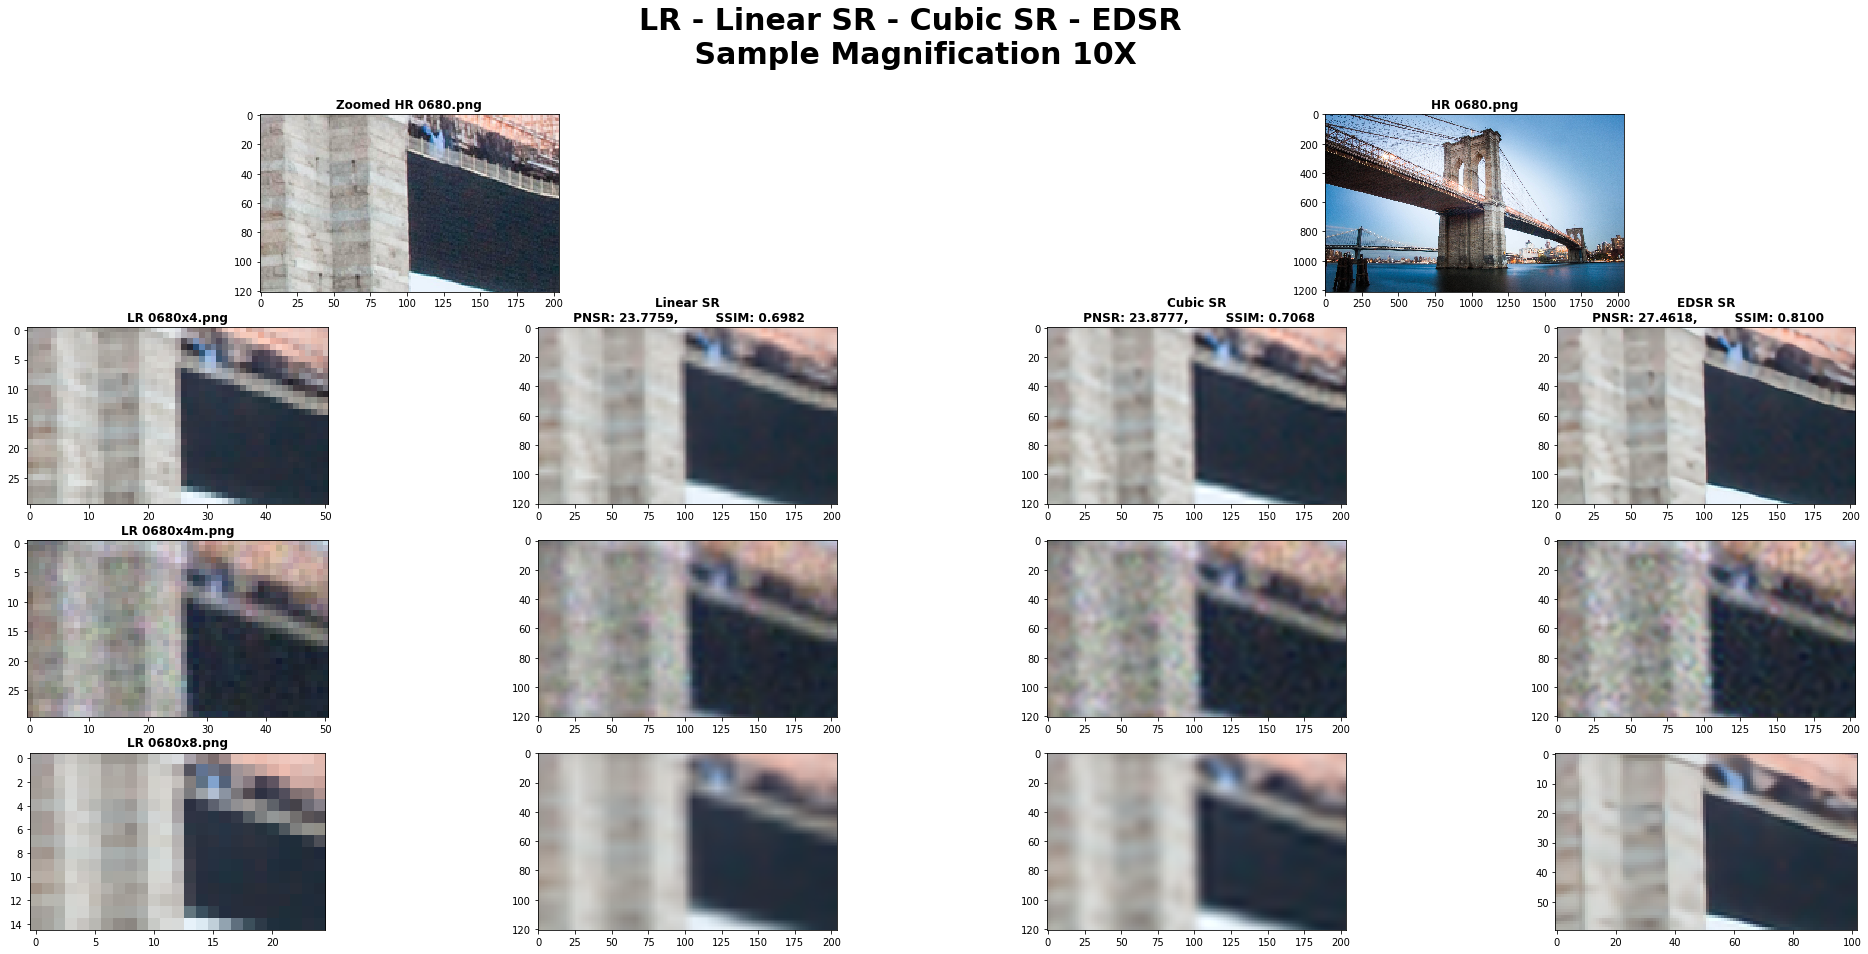

In [0]:
FIGSIZE=(35, 15)

sample_start = 0.55
sample_end = 0.65
magnification = np.round(1 / (sample_end - sample_start))
title = "LR - Linear SR - Cubic SR - EDSR\n Sample Magnification %dX"
left = imgs
left_mid = SR_imgs_linear
right_mid = SR_imgs_cubic
right = SR_EDSR_imgs


plt.figure(figsize=FIGSIZE).suptitle(title % magnification, fontsize=30, fontweight='bold')
ax = plt.subplot(4, 2, 1)
ax.set_title("Zoomed HR "+sample_index+'.png', fontweight='bold')
plt.imshow(sample_area(imgs[0], sample_start, sample_end))
ax = plt.subplot(4, 2, 2)
ax.set_title("HR "+sample_index+'.png', fontweight='bold')
plt.imshow(sample_area(imgs[0], 0, 1))


for i in range(1, 4):
    k = i*4 + 1
    ax = plt.subplot(4, 4, k)
    plt.imshow(sample_area(left[i], sample_start, sample_end))
    ax.set_title("LR " + samples[i].split('/')[-1], fontweight='bold')
    ax = plt.subplot(4, 4, k+1)
    plt.imshow(sample_area(left_mid[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Linear SR\n" + " PNSR: {:.4f}, \
        SSIM: {:.4f}".format(psnr(imgs[0], left_mid[i]), 
                             ssim(imgs[0], left_mid[i], multichannel=True)), fontweight="bold")
    ax = plt.subplot(4, 4, k+2)
    plt.imshow(sample_area(right_mid[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Cubic SR\n" + " PNSR: {:.4f}, \
        SSIM: {:.4f}".format(psnr(imgs[0], right_mid[i]), 
                             ssim(imgs[0], right_mid[i], multichannel=True)), fontweight="bold")
    ax = plt.subplot(4, 4, k+3)
    plt.imshow(sample_area(right[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("EDSR SR\n" + " PNSR: {:.4f}, \
        SSIM: {:.4f}".format(psnr(imgs[0], right[i]), 
                             ssim(imgs[0], right[i], multichannel=True)), fontweight="bold")
plt.show()

### DIV2K Sample 2

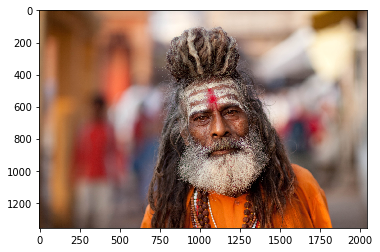

In [0]:
sample_index = "0359"

templates = [
            "DIV2K_train_HR/&.png",
            "DIV2K_train_LR_bicubic/X4/&x4.png",
            "DIV2K_train_LR_mild/&x4m.png",
            "DIV2K_train_LR_x8/&x8.png"
          ]

samples = list(map(lambda s:s.replace('&', sample_index), templates))
imgs = [np.array(Image.open(DIV2K_PATH+img)) for img in samples]
SR_imgs_linear = [imgs[0]]
SR_imgs_cubic = [imgs[0]]
SR_imgs_quintic = [imgs[0]]

x_new = np.arange(0, imgs[0].shape[0], 1)
y_new = np.arange(0, imgs[0].shape[1], 1)

for i in range(1, len(imgs)):
    SR_imgs_linear.append(interpolate_img(imgs[i], x_new, y_new, kind="linear"))
    SR_imgs_cubic.append(interpolate_img(imgs[i], x_new, y_new, kind="cubic"))
    SR_imgs_quintic.append(interpolate_img(imgs[i], x_new, y_new, kind="quintic"))

SR_EDSR_imgs = [imgs[0],
                np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}x4_x4_SR.png'.format(sample_index), 'r')),
                np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}x4m_x4_SR.png'.format(sample_index), 'r')),
                np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}x8_x4_SR.png'.format(sample_index), 'r'))]
plt.imshow(sample_area(imgs[0], 0, 1))

/usr/local/lib/python3.6/dist-packages/skimage/measure/simple_metrics.py:127: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


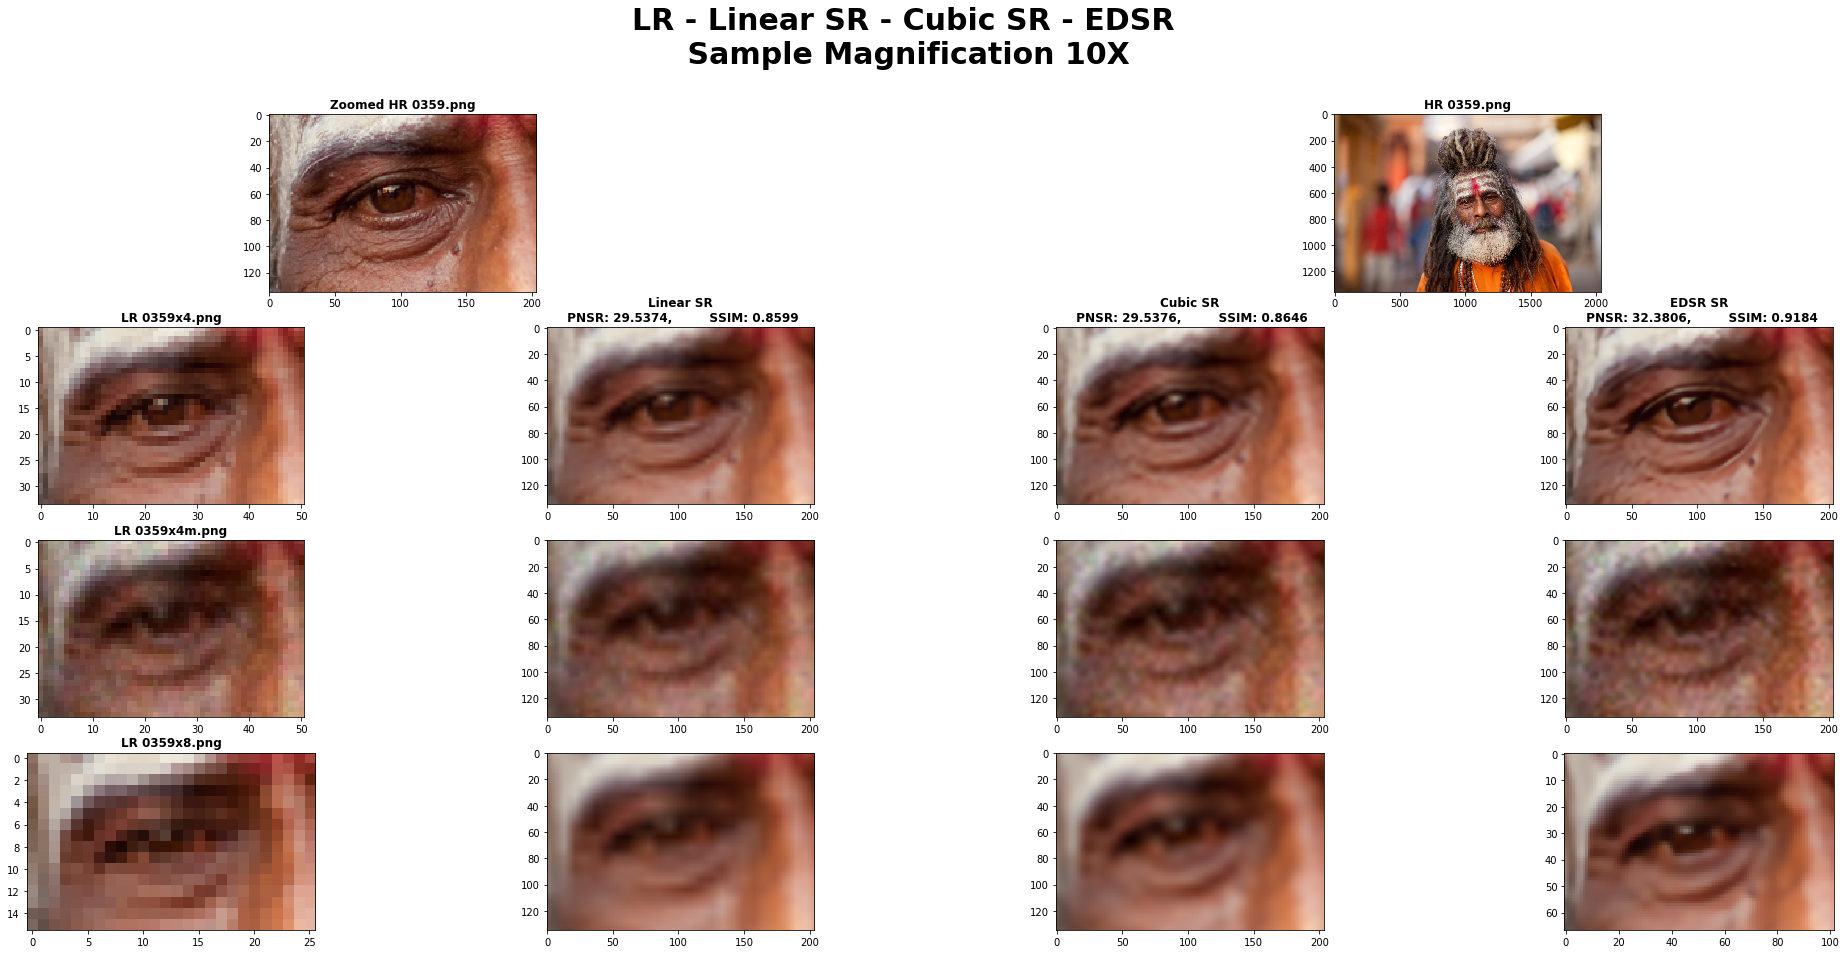

In [0]:
sample_start = 0.45
sample_end = 0.55
magnification = np.round(1 / (sample_end - sample_start))
title = "LR - Linear SR - Cubic SR - EDSR\n Sample Magnification %dX"
left = imgs
left_mid = SR_imgs_linear
right_mid = SR_imgs_cubic
right = SR_EDSR_imgs

plt.figure(figsize=FIGSIZE).suptitle(title % magnification, fontsize=30, fontweight='bold')
ax = plt.subplot(4, 2, 1)
ax.set_title("Zoomed HR "+sample_index+'.png', fontweight='bold')
plt.imshow(sample_area(imgs[0], sample_start, sample_end))
ax = plt.subplot(4, 2, 2)
ax.set_title("HR "+sample_index+'.png', fontweight='bold')
plt.imshow(sample_area(imgs[0], 0, 1))


for i in range(1, 4):
    k = i*4 + 1
    ax = plt.subplot(4, 4, k)
    plt.imshow(sample_area(left[i], sample_start, sample_end))
    ax.set_title("LR " + samples[i].split('/')[-1], fontweight='bold')
    ax = plt.subplot(4, 4, k+1)
    plt.imshow(sample_area(left_mid[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Linear SR\n" + " PNSR: {:.4f}, \
        SSIM: {:.4f}".format(psnr(imgs[0], left_mid[i]), 
                             ssim(imgs[0], left_mid[i], multichannel=True)), fontweight="bold")
    ax = plt.subplot(4, 4, k+2)
    plt.imshow(sample_area(right_mid[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Cubic SR\n" + " PNSR: {:.4f}, \
        SSIM: {:.4f}".format(psnr(imgs[0], right_mid[i]), 
                             ssim(imgs[0], right_mid[i], multichannel=True)), fontweight="bold")
    ax = plt.subplot(4, 4, k+3)
    plt.imshow(sample_area(right[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("EDSR SR\n" + " PNSR: {:.4f}, \
        SSIM: {:.4f}".format(psnr(imgs[0], right[i]), 
                             ssim(imgs[0], right[i], multichannel=True)), fontweight="bold")
plt.show()

## ANIME Faces DEMO

### ANIME Faces Sample 1

In [0]:
sample_index = "62498_2019"

imgs = [np.array(Image.open(DATA_PATH + sample_index + ".jpg"))]
SR_imgs_linear = []
SR_imgs_cubic = []
SR_imgs_quintic = []

x_new = np.arange(0, imgs[0].shape[0]*4, 1)
y_new = np.arange(0, imgs[0].shape[1]*4, 1)
SR_imgs_linear.append(interpolate_img(imgs[0], x_new, y_new, kind="linear"))
SR_imgs_cubic.append(interpolate_img(imgs[0], x_new, y_new, kind="cubic"))
SR_imgs_quintic.append(interpolate_img(imgs[0], x_new, y_new, kind="quintic"))

SR_EDSR_imgs = [np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}_x4_SR.png'.format(sample_index), 'r'))]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


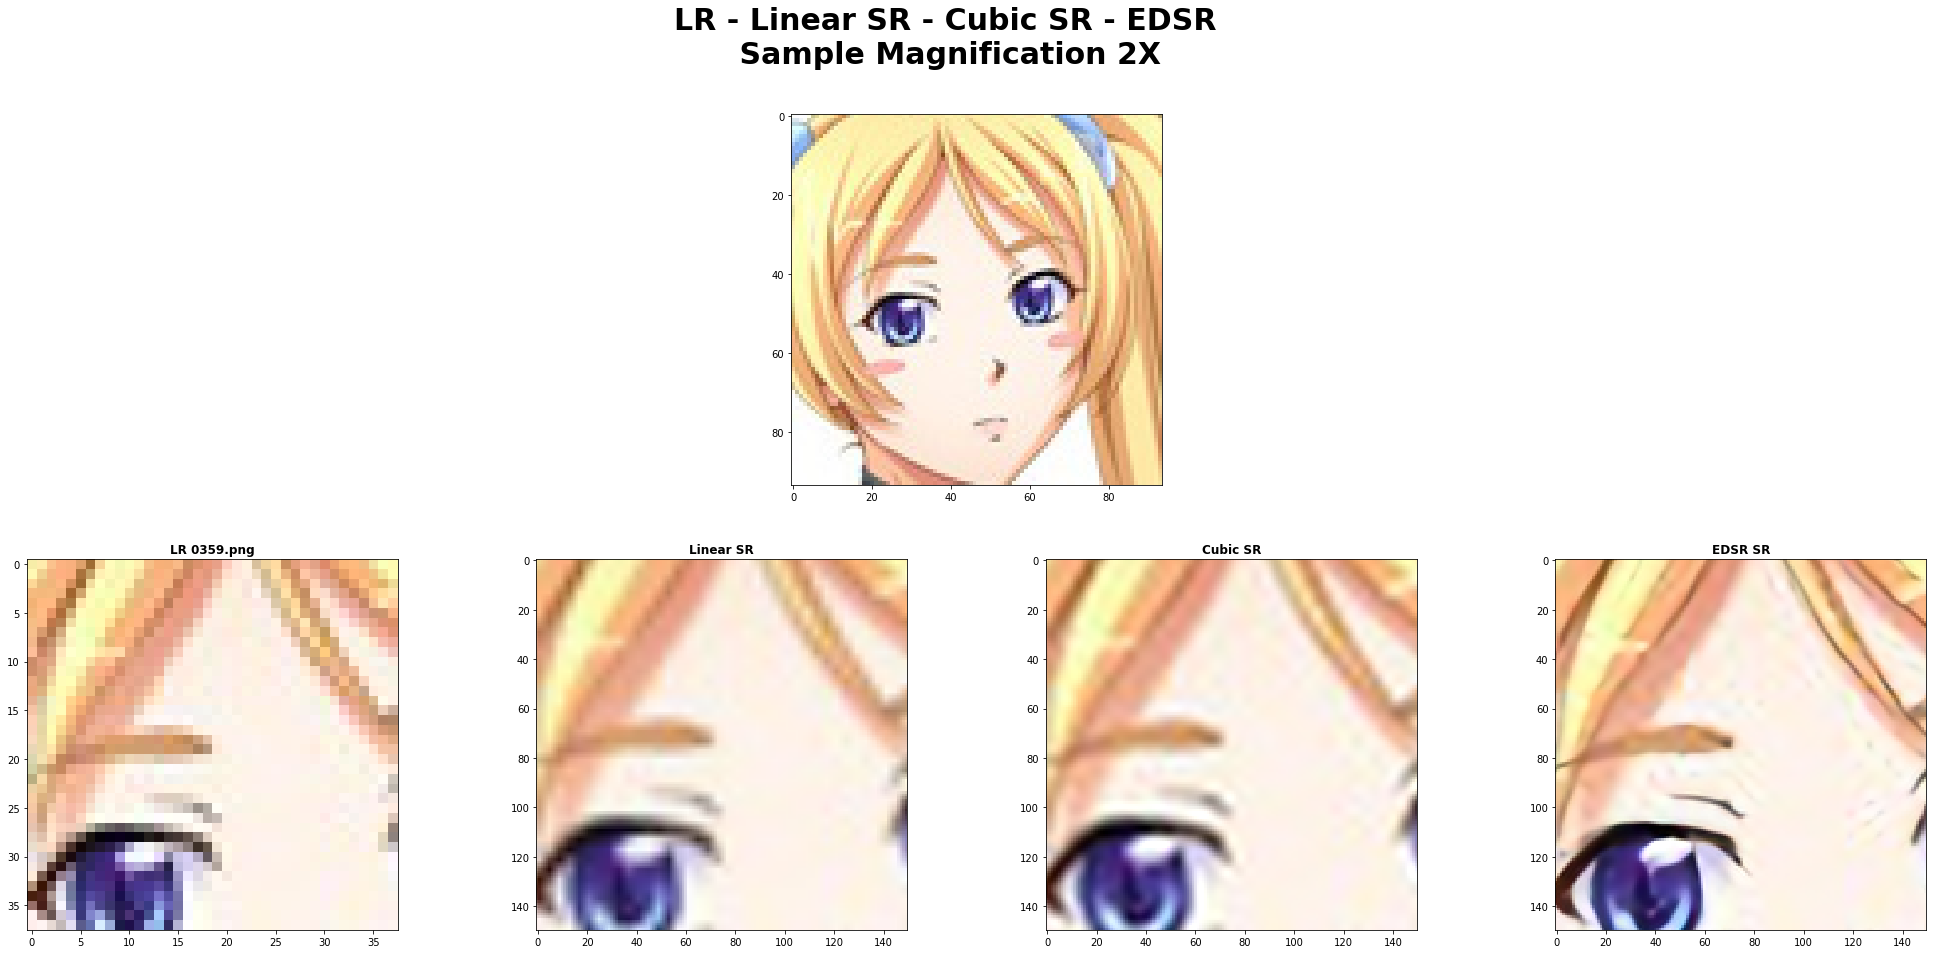

In [0]:
sample_start = 0.2
sample_end = 0.6
magnification = np.round(1 / (sample_end - sample_start))
title = "LR - Linear SR - Cubic SR - EDSR\n Sample Magnification %dX"
left = imgs
left_mid = SR_imgs_linear
right_mid = SR_imgs_cubic
right = SR_EDSR_imgs

plt.figure(figsize=FIGSIZE).suptitle(title % magnification, fontsize=30, fontweight='bold')
ax = plt.subplot(2, 1, 1)
plt.imshow(imgs[0])

i = 0
k = 4 + 1
ax = plt.subplot(2, 4, k)
plt.imshow(sample_area(left[i], sample_start, sample_end))
ax.set_title("LR " + samples[i].split('/')[-1], fontweight='bold')
ax = plt.subplot(2, 4, k+1)
plt.imshow(sample_area(left_mid[i], sample_start, sample_end))
ax.set_title("Linear SR", fontweight="bold")
ax = plt.subplot(2, 4, k+2)
plt.imshow(sample_area(right_mid[i], sample_start, sample_end))
ax.set_title("Cubic SR", fontweight="bold")
ax = plt.subplot(2, 4, k+3)
plt.imshow(sample_area(right[i], sample_start, sample_end))
ax.set_title("EDSR SR", fontweight="bold")
plt.show()

### ANIME Faces Sample 2

In [0]:
sample_index = "62499_2019"

imgs = [np.array(Image.open(DATA_PATH + sample_index + ".jpg"))]
SR_imgs_linear = []
SR_imgs_cubic = []
SR_imgs_quintic = []

x_new = np.arange(0, imgs[0].shape[0]*4, 1)
y_new = np.arange(0, imgs[0].shape[1]*4, 1)
SR_imgs_linear.append(interpolate_img(imgs[0], x_new, y_new, kind="linear"))
SR_imgs_cubic.append(interpolate_img(imgs[0], x_new, y_new, kind="cubic"))
SR_imgs_quintic.append(interpolate_img(imgs[0], x_new, y_new, kind="quintic"))

SR_EDSR_imgs = [np.array(Image.open(BASE_PATH + 'Midterm Presentation/EDSR/{0:}_x4_SR.png'.format(sample_index), 'r'))]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


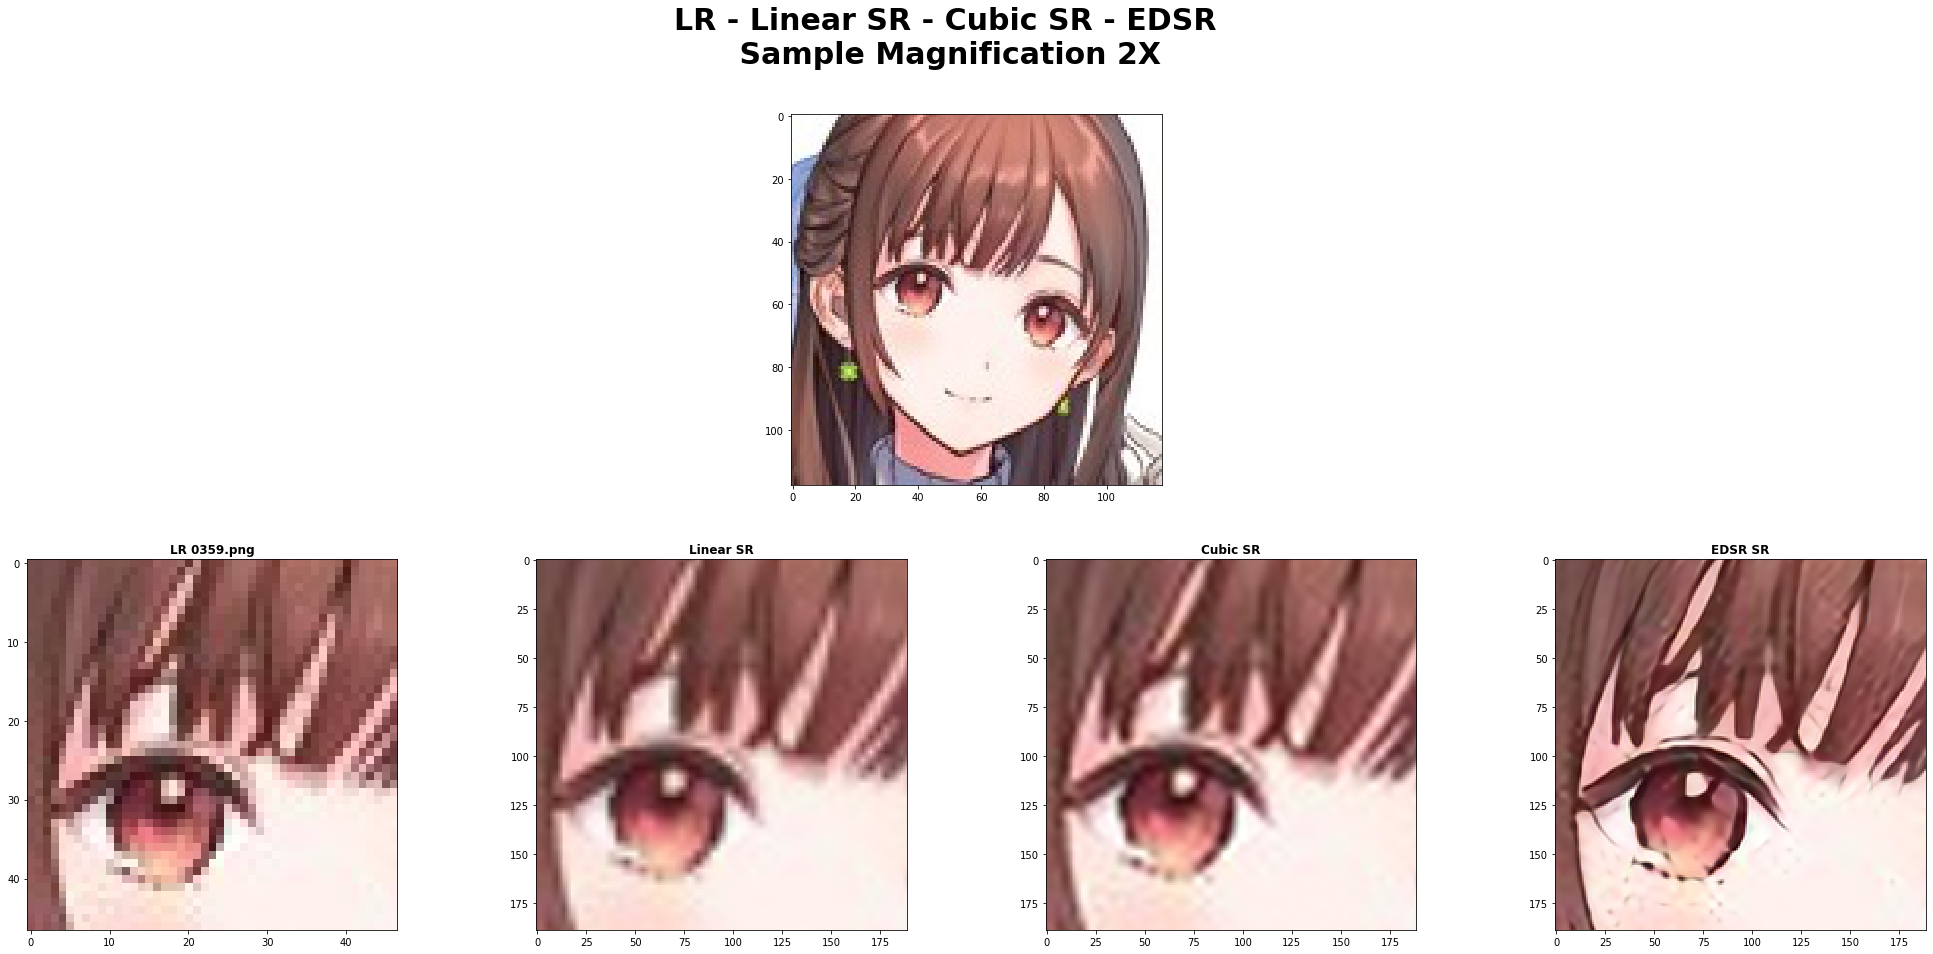

In [0]:
sample_start = 0.2
sample_end = 0.6
magnification = np.round(1 / (sample_end - sample_start))
title = "LR - Linear SR - Cubic SR - EDSR\n Sample Magnification %dX"
left = imgs
left_mid = SR_imgs_linear
right_mid = SR_imgs_cubic
right = SR_EDSR_imgs

plt.figure(figsize=FIGSIZE).suptitle(title % magnification, fontsize=30, fontweight='bold')
ax = plt.subplot(2, 1, 1)
plt.imshow(imgs[0])

i = 0
k = 4 + 1
ax = plt.subplot(2, 4, k)
plt.imshow(sample_area(left[i], sample_start, sample_end))
ax.set_title("LR " + samples[i].split('/')[-1], fontweight='bold')
ax = plt.subplot(2, 4, k+1)
plt.imshow(sample_area(left_mid[i], sample_start, sample_end))
ax.set_title("Linear SR", fontweight="bold")
ax = plt.subplot(2, 4, k+2)
plt.imshow(sample_area(right_mid[i], sample_start, sample_end))
ax.set_title("Cubic SR", fontweight="bold")
ax = plt.subplot(2, 4, k+3)
plt.imshow(sample_area(right[i], sample_start, sample_end))
ax.set_title("EDSR SR", fontweight="bold")
plt.show()